# Mamdani Inference with HotFIS

> This notebook demonstrates a simple use case where a fuzzy inference system (FIS) is created using HotFIS to address the temperature-heater example often used to illustrate fuzzy logic and Mamdani inference.

---

## Table of Contents

* [Setup](#c0)
* [FIS Creation](#c1)
* [FIS Evaluation](#c2)

---

## Setup  <a name="c0"></a>

In [19]:
import hotfis as hf

# Import matplotlib for plotting functionality
import matplotlib.pyplot as plt

---

## FIS Creation  <a name="c1"></a>

##### Create Membership Function Groupset

> Creating a FIS requires the definition of membership functions corresponding to fuzzy sets. To do this, a FuzzyGroupset must be constructed. FuzzyGroupsets are collections of FuzzyGroups that themselves contain FuzzyFuncs, or functions capable of computing membership of input to implicitly defined fuzzy sets.

In [10]:
# Define membership function groupset
groupset = hf.FuzzyGroupset([
    # Define the temperature input group with a domain of 0-100
    hf.FuzzyGroup("temperature", 0, 100, [
        hf.FuzzyFunc("cold", [30, 40], "leftedge"),
        hf.FuzzyFunc("warm", [30, 40, 60, 70], "trapezoidal"),
        hf.FuzzyFunc("hot", [60, 70], "rightedge")
    ]),

    # Define the heater output group with a domain of 0-1
    hf.FuzzyGroup("heater", 0.0, 1.0, [
        hf.FuzzyFunc("off", [0.1, 0.2], "leftedge"),
        hf.FuzzyFunc("medium", [0.1, 0.2, 0.8, 0.9], "trapezoidal"),
        hf.FuzzyFunc("on", [0.8, 0.9], "rightedge")
    ]),
])

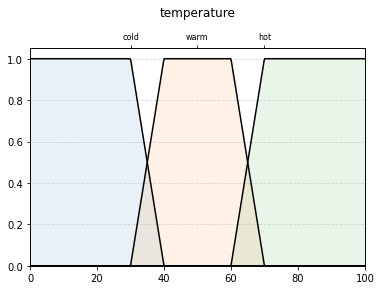

In [13]:
# A group may be plotted with the 'plot' method
groupset["temperature"].plot()
plt.show()

##### Create Fuzzy Ruleset

> The other element of a FIS is the ruleset. FuzzyRulesets may be defined with strings representing the rules. The groups and function names of the groupset must be used.

In [14]:
# Define the fuzzy ruleset using group and function names from above
ruleset = hf.FuzzyRuleset([
    hf.FuzzyRule("if temperature is cold then heater is on"),
    hf.FuzzyRule("if temperature is warm then heater is medium"),
    hf.FuzzyRule("if temperature is hot then heater is off"),
])

##### Creating the FIS

In [16]:
# Create the fuzzy inference system
fis = hf.FIS(groupset, ruleset)

---

## FIS Evaluation  <a name="c2"></a>

##### Set Inputs

In [31]:
# Inputs must map the input group names as strings to scalar or array-like inputs
# Dictionary and Pandas DataFrames are examples of valid input formats
temp_inputs = {"temperature": 67}

##### Evaluate the FIS

> To perform Mamdani evaluation as well as visualize and defuzzify output, the new FIS has the 'eval_mamdani', 'defuzz_mamdani', and 'plot_mamdani' methods. The 'eval_mamdani' method is used to create a dictionary of outputs for each output group. In this case, there will only be output for the 'heater' group. Fuzzified outputs are stored in a tuple with both a domain and codomain as arrays.

In [35]:
# Get dictionary of outputs for each group
all_outputs = fis.eval_mamdani(temp_inputs)

# Get output tuple with domain and codomain for heater group
heater_outputs = all_outputs["heater"]

# Split domain and codomain of fuzzified output
domain, codomain = heater_outputs

##### Plotting Output

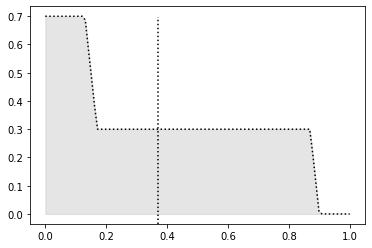

In [36]:
# Plot only output
fis.plot_mamdani(domain, codomain)
plt.show()

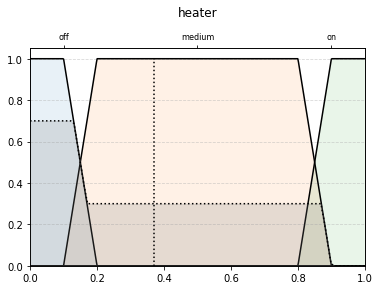

In [45]:
# Plot both group and output
fis.groupset["heater"].plot()
fis.plot_mamdani(domain, codomain)
#plt.savefig("img/mamdani_ex.png", bbox_inches="tight", facecolor="white")
plt.show()

##### Defuzzifying Output

In [40]:
final_output = fis.defuzz_mamdani(domain, codomain)
print(f"Input  : {temp_inputs['temperature']}")
print(f"Output : {final_output}")

Input  : 67
Output : [0.37079499]
